In [ ]:
!pip install matplotlib scikit-learn transformers pandas newscatcherapi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 7.8 MB/s eta 0:00:00


In [29]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from newscatcherapi import NewsCatcherApiClient
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline, T5Tokenizer, T5ForConditionalGeneration
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import pandas as pd
import re


In [78]:
# Initialize NewsCatcher API client with your API key
newscatcherapi = NewsCatcherApiClient(x_api_key='pcbPN7A0HzJquQTcEFjBM6L0LK0n2D7tAZIRb-Dsb-c')
query = "bitcoin"


In [129]:
# # Fetch Articles from NewsCatcher API
# all_articles = newscatcherapi.get_search(
#     q=query,
#     lang='en',
#     search_in='title',
#     from_='30 days ago',
#     countries='US',
#     page_size=100,
#     topic='finance',
#     sort_by='rank',
#     page=10
# )
all_articles = newscatcherapi.get_search_all_pages(
                                         q=query,
                                         from_='30 days ago',
                                         countries='US',
                                         page_size=100,
                                         topic='finance',
                                         page=10)



10 page is going to be extracted
Total number of found articles => 1720.
Total number of pages 18.
11/18 page is going to be extracted
12/18 page is going to be extracted
13/18 page is going to be extracted
14/18 page is going to be extracted
15/18 page is going to be extracted
16/18 page is going to be extracted
17/18 page is going to be extracted
18/18 page is going to be extracted


In [130]:
for article in all_articles['articles']:
    # print(article['publishedAt'])
    pass
print(all_articles['articles'][0]['published_date'])

2024-12-05 22:18:09


In [139]:
import datetime
from datetime import datetime
# Create a dictionary to group articles by day
articles_by_day = {}
for article in all_articles['articles']:
    # Parse the publication date
    pub_date = datetime.strptime(article["published_date"], "%Y-%m-%d %H:%M:%S")

    # Extract just the date part
    day = pub_date.date().isoformat()  # Convert to "YYYY-MM-DD"

    # Add article to the correct date group
    if day not in articles_by_day:
        articles_by_day[day] = []
    articles_by_day[day].append(article['title'])

In [147]:
# print(articles_by_day.keys())
sorted_articles_by_day = dict(sorted(articles_by_day.items(), reverse=True))
print(sorted_articles_by_day.keys())

dict_keys(['2024-12-10', '2024-12-09', '2024-12-08', '2024-12-07', '2024-12-06', '2024-12-05', '2024-12-04', '2024-12-03', '2024-12-02', '2024-12-01', '2024-11-30', '2024-11-29', '2024-11-28', '2024-11-27', '2024-11-26', '2024-11-25', '2024-11-24', '2024-11-23', '2024-11-22', '2024-11-21', '2024-11-20', '2024-11-19', '2024-11-18', '2024-11-17', '2024-11-16', '2024-11-15', '2024-11-14', '2024-11-13', '2024-11-12', '2024-11-11'])


In [161]:
df = pd.DataFrame()
sentiment_score = []
num_articles = 0
day = 0
for key in sorted_articles_by_day.keys():
    length = len(sorted_articles_by_day.get(key))
    sentiment = 0
    day_news = sorted_articles_by_day.get(key)
    for article in day_news:
      pred = nlp(article)[0]
      if pred['label'] == 'positive':
        sentiment += pred['score']
      elif pred['label'] == 'negative':
        sentiment -= pred['score']
      else:
        sentiment += 0
    sentiment = sentiment / length
    print(day, sentiment)
    sentiment_score.append(sentiment)

print(sentiment_scores)

# print(sorted_articles_by_day.get(key))
# print(articles_by_day.get())

[0.7841713428497314, 0.6428872346878052, 0.9358239769935608, 0.9479308724403381, 0.5925754308700562, 0.9688858389854431, 0.8728418350219727, 0.9723715782165527, 0.9452598094940186, 0.544479489326477, 0.8053331971168518, 0.9485094547271729, 0.543878972530365, 0.751247763633728, 0.7331446409225464, 0.9575108289718628, 0.8318135142326355, 0.9504996538162231, 0.857539176940918, 0.5740711092948914, 0.9678130745887756, 0.7979787588119507, 0.9619342088699341, 0.6852010488510132, 0.9129288196563721, 0.9486055374145508, 0.9387678503990173, 0.9006373286247253, 0.8434543609619141, 0.722295880317688, 0.9379947185516357, 0.814441978931427, 0.7976497411727905, 0.7308421730995178, 0.9378389120101929, 0.9537084698677063, 0.9598401188850403, 0.954951286315918, 0.8605763912200928, 0.8013370037078857, 0.975867509841919, 0.9507597088813782, 0.7838734984397888, 0.6031001806259155, 0.6607272028923035, 0.8594009280204773, 0.7557295560836792, 0.8865906596183777, 0.6056006550788879, 0.9400750994682312, 0.58997

In [216]:
print(sentiment_scores[4])

0.5925754308700562


In [205]:
stock_df = pd.read_csv('Bitcoin.csv')
sent_df = pd.DataFrame(sentiment_scores, columns=['sentiment'])


In [206]:
stock_df['sentiment'] = sent_df['sentiment']

In [286]:
print(stock_df.head())

         Date      Price       Open       High       Low     Vol  Change  \
0  12/10/2024   96,600.3   97,311.5   98,237.8  94,304.5  271.45   -0.78   
1  12/09/2024   97,359.4  101,129.7  101,198.6  94,395.8  321.01   -3.72   
2  12/08/2024  101,115.8   99,837.0  101,339.9  98,713.9  128.93    1.28   
3  12/07/2024   99,837.0   99,757.2  100,441.8  98,969.0  118.44    0.08   
4  12/06/2024   99,760.7   96,968.9  101,908.5  96,452.0  213.49    2.88   

   sentiment  price_movement  
0   0.784171               0  
1   0.642887               0  
2   0.935824               1  
3   0.947931               1  
4   0.592575               1  


In [287]:
# Add target variable: price movement (1 for up, 0 for down)
stock_df['price_movement'] = (stock_df['Change'] > 0).astype(int)

# Select features
features = ['Vol', 'sentiment']
X = stock_df[features]
y = stock_df['price_movement']


In [288]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [289]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Convert data into DMatrix format, required by XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define parameters for XGBoost
params = {
    'objective': 'binary:logistic',  # Binary classification
    'max_depth': 4,                 # Tree depth
    'eta': 0.1,                     # Learning rate
    'eval_metric': 'logloss',       # Loss function
    'seed': 42                      # Seed for reproducibility
}

# Train the model
bst = xgb.train(params, dtrain, num_boost_round=100)



## XGB accuracy

In [290]:
# Predict on test data
y_pred_prob = bst.predict(dtest)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Model Accuracy: {accuracy:.2f}")



XGBoost Model Accuracy: 0.17


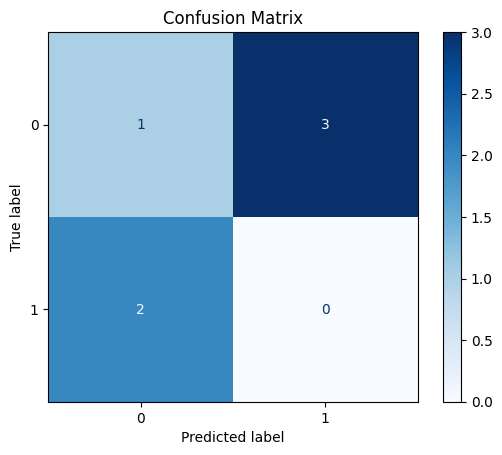

In [291]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])  # 0 = down, 1 = up
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


## Not enough samples to train on.

## Not enough articles available each day for every company

In [ ]:
for articles_each_day in articles_by_day.items():
    print(article)

In [90]:
# Extract unique articles by their summaries
try:
    unique_articles = set(article['summary'] for article in all_articles['articles'])
except KeyError:
    print("Error: 'summary' not found in articles.")
    unique_articles = []


In [91]:
print(len(unique_articles))

69


In [74]:
# Load Sentiment Analysis model (FinBERT)
model_name = "ProsusAI/finbert"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)
nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer, truncation=True)


In [75]:
# Analyze sentiment of each article
sentiment_scores = []
sentiment_labels = []
num_positive, num_negative, num_neutral = 0, 0, 0
article_predictions = []  # To store article summaries and their predictions

for article in unique_articles:
    try:
        pred = nlp(article)[0]
        sentiment_scores.append(pred['score'])
        sentiment_labels.append(pred['label'])
        article_predictions.append([article, pred['label']])
        print(f"Article: {article}\nPrediction: {pred}\n")
        if pred['label'] == 'positive':
            num_positive += 1
        elif pred['label'] == 'negative':
            num_negative += 1
        else:
            num_neutral += 1
    except Exception as e:
        print(f"Error processing article: {e}")


Article: Based in Bellevue, Washington, PACCAR Inc (PCAR) is a $60 billion company specializing in the design, manufacturing, and support of premium light, medium, and heavy-duty trucks under the Kenworth, Peterbilt, and DAF brands. PACCAR also develops advanced diesel engines, offers financial services, provides IT solutions, and distributes truck parts.
Shares of this heavy-duty truck titan have underperformed the broader market considerably over the past year. PCAR has gained 31.9% over this time frame, while the broader S&P 500 Index ($SPX) has rallied nearly 35.9%. In 2024, PCAR stock is up 19.2%, while the SPX is up 25.8% on a YTD basis.
Narrowing the focus, PCAR has also trailed the Industrial Select Sector SPDR Fund (XLI). The exchange-traded fund has gained about 39.6% over the past year. The ETF's 25.6% returns on a YTD basis outshine the stock's returns over the same time frame.
On Nov. 6, PCAR shares surged more than 7% following Donald Trump's 2024 presidential election vi

In [82]:
print(len(unique_articles))

100


In [83]:
# Calculate Stability Index and other statistics
stability_index = sum(
    score if label == 'positive' else -score
    for score, label in zip(sentiment_scores, sentiment_labels)
) / len(sentiment_scores) if sentiment_scores else 0

mean_score = np.mean(sentiment_scores) if sentiment_scores else 0
std_deviation = np.std(sentiment_scores) if sentiment_scores else 0

# Print summary statistics
print(f"Stability Index: {stability_index}")
print(f"Mean Sentiment Score: {mean_score}")
print(f"Sentiment Standard Deviation: {std_deviation}")
print(f"Positive Articles: {num_positive}")
print(f"Negative Articles: {num_negative}")
print(f"Neutral Articles: {num_neutral}")


Stability Index: -0.1281704181432724
Mean Sentiment Score: 0.8272397667169571
Sentiment Standard Deviation: 0.14008245178362397
Positive Articles: 42
Negative Articles: 35
Neutral Articles: 23


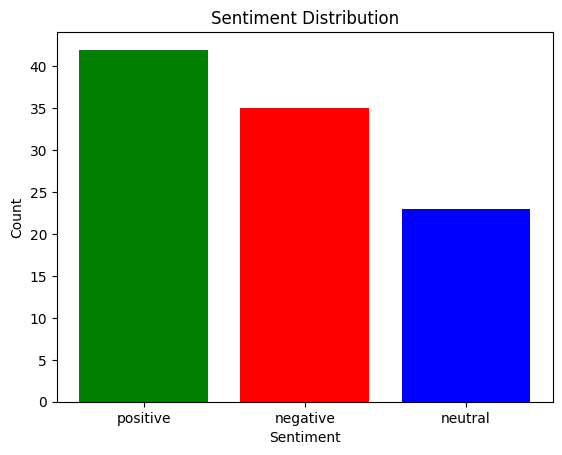

In [84]:
# Visualize the distribution of sentiment labels
def plot_sentiment_distribution(labels):
    counts = Counter(labels)
    labels, values = zip(*counts.items())
    plt.bar(labels, values, color=['green', 'red', 'blue'])
    plt.xlabel("Sentiment")
    plt.ylabel("Count")
    plt.title("Sentiment Distribution")
    plt.savefig('sentiment_distribution.png')  # Save the chart
    plt.show()

plot_sentiment_distribution(sentiment_labels)


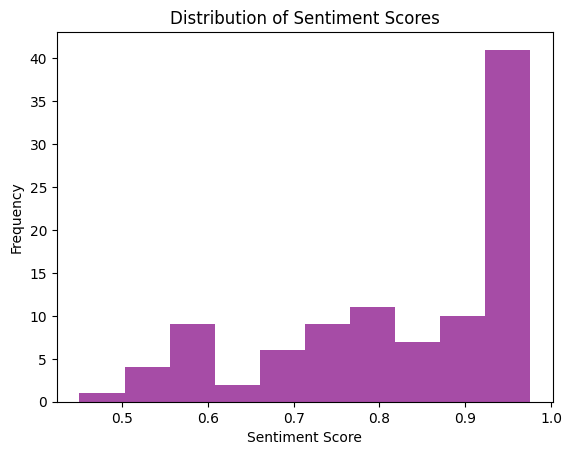

In [85]:
# Visualize the distribution of sentiment scores
def plot_sentiment_scores(scores):
    plt.hist(scores, bins=10, color='purple', alpha=0.7)
    plt.xlabel("Sentiment Score")
    plt.ylabel("Frequency")
    plt.title("Distribution of Sentiment Scores")
    plt.savefig('sentiment_scores.png')  # Save the chart
    plt.show()

plot_sentiment_scores(sentiment_scores)


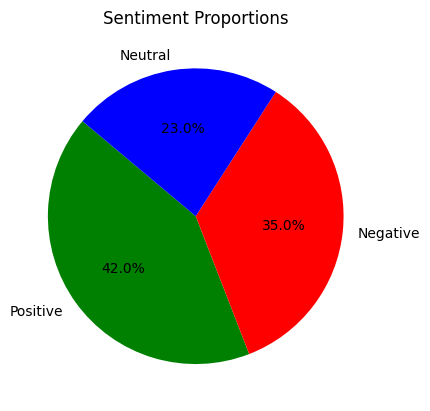

In [86]:
# Pie chart for sentiment proportions
labels = ['Positive', 'Negative', 'Neutral']
sizes = [num_positive, num_negative, num_neutral]
colors = ['green', 'red', 'blue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Sentiment Proportions")
plt.savefig('sentiment_proportions.png')  # Save the chart
plt.show()


In [ ]:
# Topic extraction from articles using TF-IDF
try:
    tfidf = TfidfVectorizer(max_features=10)
    features = tfidf.fit_transform(unique_articles)
    print("Top Topics:", tfidf.get_feature_names_out())
except ValueError as e:
    print("Error in topic extraction:", e)


Top Topics: ['after' 'and' 'ap' 'as' 'for' 'in' 'of' 'on' 'the' 'to']


In [ ]:
# Summarize the articles using T5
summarizer_model_name = "t5-small"
summarizer_tokenizer = T5Tokenizer.from_pretrained(summarizer_model_name)
summarizer_model = T5ForConditionalGeneration.from_pretrained(summarizer_model_name)

for article in unique_articles:
    article = "summarize: " + article
    inputs = summarizer_tokenizer.encode(article, return_tensors="pt", max_length=512, truncation=True)
    outputs = summarizer_model.generate(
        inputs,
        max_length=50,
        min_length=15,
        length_penalty=2.0,
        num_beams=5,
        early_stopping=True
    )
    summary = summarizer_tokenizer.decode(outputs[0], skip_special_tokens=True)
    print("Summary:", summary)


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Summary: the S&P 500 was virtually unchanged, a day after pulling back from its latest all-time high. the Dow Jones Industrial Average fell 139 points, or 0.3%, as of 9:35 a.m. Eastern
Summary: shares mixed in Asia, with Chinese shares leading gains. the yen surged against the u.s. dollar. the dollar fell to 151.59 yen.
Summary: stock markets fall in Europe and are mixed on Wall Street. investors retreat as fears of escalation of war against Ukraine prompted investors to retreat.
Summary: the S&P 500 was down 0.1% in the early going Wednesday. losses for Nvidia and Microsoft helped pull the index lower. Dell sank after reporting revenue that fell shy of forecasts.
Summary: world shares started out the week mixed after u.s. stocks fell to their worst loss since election day. the S&P 500 contract up less than 0.1% and that for the Dow Jones Industrial Average 0.1% lower. speculation
Summary: DAX lost 0.5% to 19,196.97 while the CAC 40 in Paris shed 1.2% to 7,109.24. FTSE 100 edged 0.1% h

In [ ]:
# Save predictions to a .tsv file
df = pd.DataFrame(article_predictions, columns=["Article", "Sentiment"])
df.to_csv('article_predictions.tsv', sep='\t', index=False)


In [96]:
# Test data and corresponding labels for evaluation

test_dataset = pd.read_csv('all-data.csv', encoding='latin-1')
test_dataset.columns = ['label', 'text']
test_dataset = test_dataset.head(1000)

test_data = test_dataset['text'].tolist()
test_labels = test_dataset['label'].tolist()

# Predictions from the model
predicted_labels = [nlp(text)[0]['label'] for text in test_data]


In [97]:
from nltk.corpus import stopwords
from collections import Counter
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
all_words = ' '.join(test_data)

all_words = re.sub(r'[^a-z\s]', '', all_words)

all_words = all_words.split()

filtered_words = [word for word in all_words if word not in stop_words]
word_counts = Counter(filtered_words)
most_common_word, most_common_count = word_counts.most_common(1)[0]

print(most_common_word)
print(most_common_count)

mn
229


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [98]:
# Evaluate performance on test data
accuracy = accuracy_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels, average='weighted')
recall = recall_score(test_labels, predicted_labels, average='weighted')
f1 = f1_score(test_labels, predicted_labels, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.903
Precision: 0.9012674752217006
Recall: 0.903
F1 Score: 0.8999712765181891


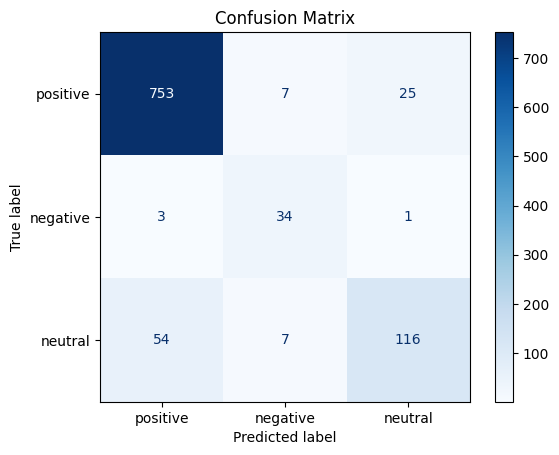

Classification Report:
               precision    recall  f1-score   support

    positive       0.93      0.96      0.94       785
    negative       0.71      0.89      0.79        38
     neutral       0.82      0.66      0.73       177

    accuracy                           0.90      1000
   macro avg       0.82      0.84      0.82      1000
weighted avg       0.90      0.90      0.90      1000



In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels, labels=["positive", "negative", "neutral"])
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["positive", "negative", "neutral"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.savefig('confusion_matrix.png')  # Save the chart
plt.show()

# Classification Report
report = classification_report(test_labels, predicted_labels, labels=["positive", "negative", "neutral"])
print("Classification Report:\n", report)


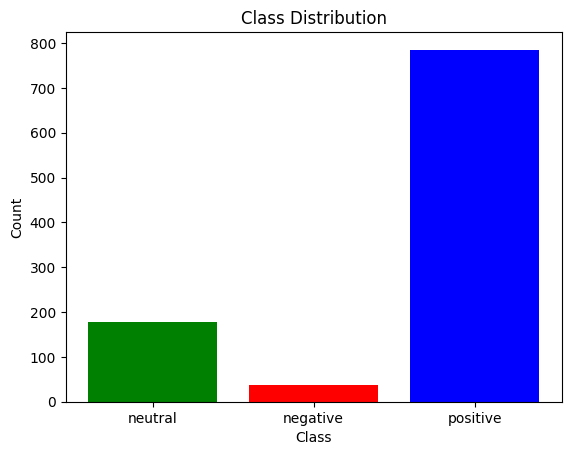

In [ ]:
# Plot the distribution of the classes in test data
def plot_class_distribution(labels):
    counts = Counter(labels)
    labels, values = zip(*counts.items())
    plt.bar(labels, values, color=['green', 'red', 'blue'])
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.title("Class Distribution")
    plt.savefig('class_distribution.png')  # Save the chart
    plt.show()

plot_class_distribution(test_labels)


In [ ]:
# Cross-validation with RandomForestClassifier
# Cross-validation with RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(test_data, test_labels, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Perform cross-validation with the vectorized training data
cross_val_scores = cross_val_score(RandomForestClassifier(), X_train_vec, y_train, cv=5)
print(f"Cross-validation scores: {cross_val_scores}")
print(f"Mean Cross-validation score: {np.mean(cross_val_scores)}")


Cross-validation scores: [0.78125 0.775   0.7875  0.7875  0.79375]
Mean Cross-validation score: 0.7849999999999999
